In [35]:
import pandas as pd


In [50]:
df = pd.read_csv('full.csv')

from utils import data_munging, add_cumulative_stats
df_full, df_full_nums = data_munging()


/Users/joshualambert/Desktop/repos/DadBodBombers/utils.py:106: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  recent_game.replace('', 0, inplace=True)


In [51]:
df_agg = df_full.groupby(['id', 'name'])[['atbats', 'run', 'rbi', 'walks', 'single', 'double', 'triple', 'homerun', 'games_played']].sum().reset_index()
df = add_cumulative_stats(df_agg)


In [52]:
df

,id,name,atbats,run,rbi,walks,single,double,triple,homerun,games_played,batting_average,hits,onbase,slugging,onbase_plus_slugging,total_bases
0,1,Josh,54,35.0,26.0,4,15,5,9,6,19,700.000000,35,722.222222,1407.407407,2129.629630,76
1,3,Cody,53,25.0,16.0,5,18,5,3,1,18,562.500000,27,603.773585,773.584906,1377.358491,41
2,4,Ben,55,23.0,20.0,4,24,5,1,3,19,647.058824,33,672.727273,890.909091,1563.636364,49
3,5,Grace,59,35.0,21.0,10,26,6,3,2,20,755.102041,37,796.610169,932.203390,1728.813559,55
4,6,Tyler,39,20.0,14.0,3,14,5,4,2,13,694.444444,25,717.948718,1128.205128,1846.153846,44
5,7,Sean,53,6.0,7.0,3,14,2,0,0,20,320.000000,16,358.490566,339.622642,698.113208,18
6,8,Sweet,35,16.0,11.0,3,22,1,0,0,13,718.750000,23,742.857143,685.714286,1428.571429,24
7,9,Niko,32,11.0,17.0,0,9,0,2,3,11,437.500000,14,437.500000,843.750000,1281.250000,27
8,10,Renzo,22,4.0,2.0,0,10,1,0,0,8,500.000000,11,500.000000,545.454545,1045.454545,12
9,11,Frank,30,6.0,5.0,1,12,0,0,0,13,413.793103,12,433.333333,400.000000,833.333333,12


In [60]:
test = df_full.groupby('game')[['games_played', 'run', 'single', 'double', 'triple', 'homerun', 'rbi']].sum().reset_index()
test['Number of Players'] = test['games_played']
test['Runs'] = test['run']
correlation = test.loc[test['games_played']>11][['Number of Players', 'Runs', 'single', 'double', 'triple', 'homerun', 'rbi']].corr()

In [61]:
correlation

,Number of Players,Runs,single,double,triple,homerun,rbi
Number of Players,1.000000e+00,-0.925342,-0.942232,-0.820413,NaN,-1.326970e-16,-0.880952
Runs,-9.253423e-01,1.000000,0.931707,0.672894,NaN,0.000000e+00,0.864003
single,-9.422315e-01,0.931707,1.000000,0.583410,NaN,7.437051e-02,0.794082
double,-8.204127e-01,0.672894,0.583410,1.000000,NaN,-1.961161e-01,0.820413
triple,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homerun,-1.326970e-16,0.000000,0.074371,-0.196116,NaN,1.000000e+00,-0.448211
rbi,-8.809524e-01,0.864003,0.794082,0.820413,NaN,-4.482107e-01,1.000000


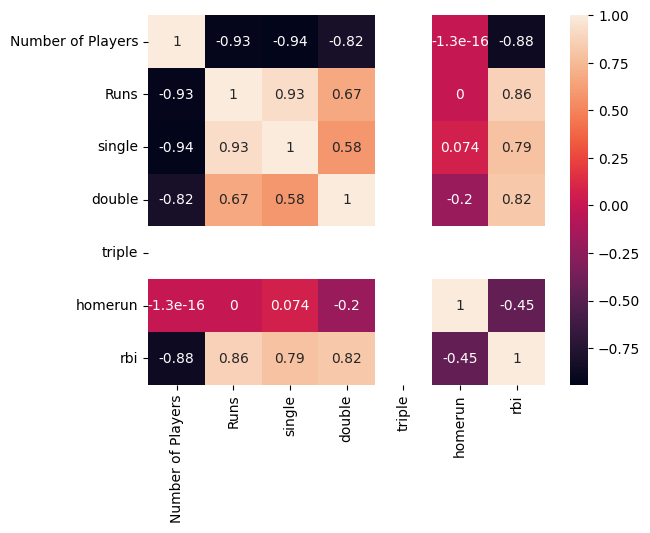

In [62]:
import seaborn as sns

corrplot = sns.heatmap(correlation, annot=True)

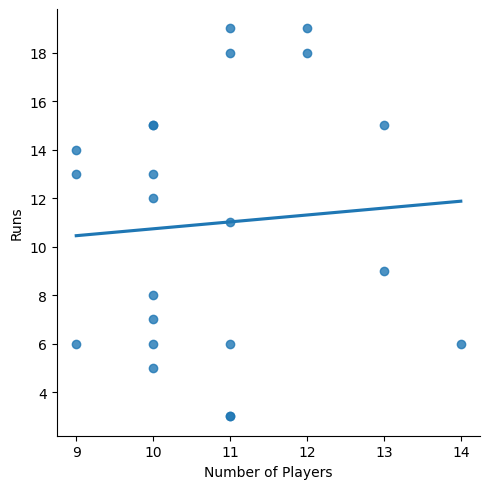

In [56]:
linplot = sns.lmplot(x='Number of Players', y='Runs', data=test, scatter=True, ci=False)

In [16]:
df_agg

,id,name,atbats,run,rbi,walks,single,double,triple,homerun,games_played,batting_average,hits,onbase,slugging,onbase_plus_slugging,total_bases
0,1,Josh,54,35.0,26.0,4,15,5,9,6,19,700.000000,35,722.222222,1407.407407,2129.629630,76
1,2,Clos,20,3.0,4.0,1,3,1,1,1,7,315.789474,6,350.000000,600.000000,950.000000,12
2,3,Cody,53,25.0,16.0,5,18,5,3,1,18,562.500000,27,603.773585,773.584906,1377.358491,41
3,4,Ben,55,23.0,20.0,4,24,5,1,3,19,647.058824,33,672.727273,890.909091,1563.636364,49
4,5,Grace,59,35.0,21.0,10,26,6,3,2,20,755.102041,37,796.610169,932.203390,1728.813559,55
5,6,Tyler,39,20.0,14.0,3,14,5,4,2,13,694.444444,25,717.948718,1128.205128,1846.153846,44
6,7,Sean,53,6.0,7.0,3,14,2,0,0,20,320.000000,16,358.490566,339.622642,698.113208,18
7,8,Sweet,35,16.0,11.0,3,22,1,0,0,13,718.750000,23,742.857143,685.714286,1428.571429,24
8,9,Niko,32,11.0,17.0,0,9,0,2,3,11,437.500000,14,437.500000,843.750000,1281.250000,27
9,10,Renzo,22,4.0,2.0,0,10,1,0,0,8,500.000000,11,500.000000,545.454545,1045.454545,12


In [18]:
df_games = df_full.groupby(['game'])[['atbats', 'run', 'rbi', 'walks', 'single', 'double', 'triple', 'homerun', 'games_played']].sum().reset_index()

df = add_cumulative_stats(df_games)

game_list = []
for i in df_full['game'].unique():
    game_df = df_full.loc[df_full['game']==i]
    game_df_stats = add_cumulative_stats(game_df)
    game_df_stats['game'] = 'Game ' + str(i)
    game_list.append(game_df_stats)
temporal = pd.concat(game_list)
temporal['Game Number'] = temporal['game'].str.split(' ').str[1].astype(int)
temporal = temporal.sort_values(by='Game Number')


/Users/joshualambert/Desktop/repos/DadBodBombers/utils.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['atbats', 'walks', 'single', 'double', 'triple', 'homerun']] = df[['atbats', 'walks', 'single', 'double', 'triple', 'homerun']].astype(int)
/Users/joshualambert/Desktop/repos/DadBodBombers/utils.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['batting_average'] = (df['single'] + df['double'] + df['triple'] + df['homerun'])  / (df['atbats'] - df['walks']) * (1000)
/Users/joshualambert/Des

In [25]:
gamnumber = temporal.groupby('Game Number')['games_played'].sum().reset_index()

In [31]:
avgs = temporal.groupby('Game Number')[['batting_average', 'onbase', 'slugging']].mean().reset_index()

merged = pd.merge(gamnumber, avgs, on='Game Number')
merged['Number of players'] = merged['games_played']

In [32]:
merged

,Game Number,games_played,batting_average,onbase,slugging,Number of players
0,1,13,653.846154,692.307692,846.153846,13
1,2,10,700.000000,675.000000,675.000000,10
2,3,10,433.333333,450.000000,583.333333,10
3,4,11,378.787879,424.242424,515.151515,11
4,5,11,575.757576,621.212121,1151.515152,11
5,6,10,450.000000,483.333333,616.666667,10
6,7,10,716.666667,733.333333,966.666667,10
7,8,12,416.666667,416.666667,541.666667,12
8,9,10,400.000000,400.000000,800.000000,10
9,10,10,400.000000,450.000000,766.666667,10


In [63]:
correlation = merged.loc[merged['games_played']>11][['Number of players', 'batting_average', 'onbase', 'slugging']].corr()
correlation

,Number of players,batting_average,onbase,slugging
Number of players,1.000000,-0.396250,-0.353755,-0.304049
batting_average,-0.396250,1.000000,0.991384,0.877400
onbase,-0.353755,0.991384,1.000000,0.816388
slugging,-0.304049,0.877400,0.816388,1.000000


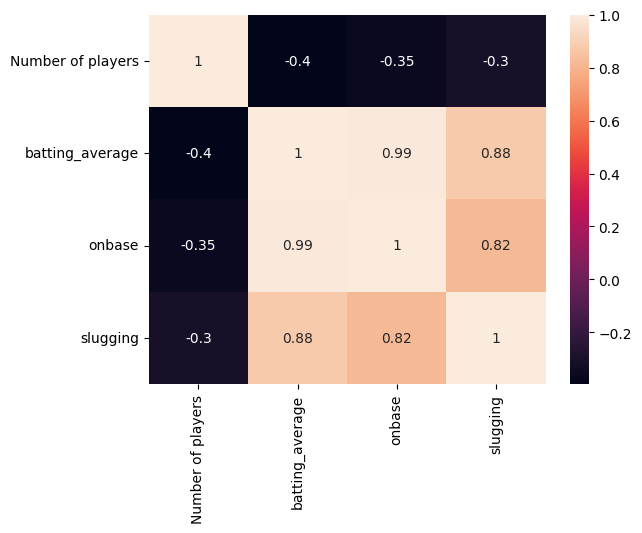

In [64]:
corrplot = sns.heatmap(correlation, annot=True)

In [1]:
from pydantic import BaseModel, Field
from llama_index import Document

from llama_index.llms.openai import OpenAI
from llama_index.core.query_engine import PandasQueryEngine
from utils import data_munging, add_cumulative_stats


ValidationError: 1 validation error for DataSource
component_type
  subclass of BaseComponent expected (type=type_error.subclass; expected_class=BaseComponent)

In [10]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_experimental.tools import PythonAstREPLTool
from utils import data_munging, add_cumulative_stats


llm = ChatOpenAI()

2024-03-07 07:40:52.219 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-03-07 07:40:52.221 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-03-07 07:40:52.226 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [15]:
df_full, df_full_nums = data_munging()
df_agg = df_full.groupby(['id', 'name'])[['atbats', 'run', 'rbi', 'walks', 'single', 'double', 'triple', 'homerun', 'games_played']].sum().reset_index()
df = add_cumulative_stats(df_agg)

tool = PythonAstREPLTool(locals={"df": df})

llm_with_tools = llm.bind_tools([tool], tool_choice=tool.name)
llm_with_tools.invoke(
    "I have a dataframe 'df' and want to know the batting_average of Josh"
)


/Users/joshualambert/Desktop/repos/DadBodBombers/utils.py:106: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  recent_game.replace('', 0, inplace=True)


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_vNU718z8Jsr3gkTzKEhvwBuF', 'function': {'arguments': '{"query":"df[\'batting_average\'][df[\'player\']==\'Josh\']"}', 'name': 'python_repl_ast'}, 'type': 'function'}]})

In [14]:
df

,id,name,atbats,run,rbi,walks,single,double,triple,homerun,games_played,batting_average,hits,onbase,slugging,onbase_plus_slugging,total_bases
0,1,Josh,54,35.0,26.0,4,15,5,9,6,19,700.000000,35,722.222222,1407.407407,2129.629630,76
1,3,Cody,53,25.0,16.0,5,18,5,3,1,18,562.500000,27,603.773585,773.584906,1377.358491,41
2,4,Ben,55,23.0,20.0,4,24,5,1,3,19,647.058824,33,672.727273,890.909091,1563.636364,49
3,5,Grace,59,35.0,21.0,10,26,6,3,2,20,755.102041,37,796.610169,932.203390,1728.813559,55
4,6,Tyler,39,20.0,14.0,3,14,5,4,2,13,694.444444,25,717.948718,1128.205128,1846.153846,44
5,7,Sean,53,6.0,7.0,3,14,2,0,0,20,320.000000,16,358.490566,339.622642,698.113208,18
6,8,Sweet,35,16.0,11.0,3,22,1,0,0,13,718.750000,23,742.857143,685.714286,1428.571429,24
7,9,Niko,32,11.0,17.0,0,9,0,2,3,11,437.500000,14,437.500000,843.750000,1281.250000,27
8,10,Renzo,22,4.0,2.0,0,10,1,0,0,8,500.000000,11,500.000000,545.454545,1045.454545,12
9,11,Frank,30,6.0,5.0,1,12,0,0,0,13,413.793103,12,433.333333,400.000000,833.333333,12


In [2]:
df_full, df_full_nums = data_munging()
df = add_cumulative_stats(df_agg)

with st.sidebar: get_sideBar('Team Stats')

llm = OpenAI(api_key= st.secrets.openai_key)

query_engine = PandasQueryEngine(df=df, verbose=True)
response = query_engine.query(
    "What is Josh's batting average?",
)

#st.write(response)

NameError: name 'data_munging' is not defined